In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from math import isnan
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow import feature_column
from tensorflow.keras import layers

print(tf.__version__)

2.2.0-rc3


In [3]:
# df = pd.read_csv(root_path + 'mobilbekas.csv')

!wget https://raw.githubusercontent.com/bangkitjkt/bangkit-1/master/data/mobilbekas.csv
df = pd.read_csv('mobilbekas.csv')

--2020-04-19 16:42:08--  https://raw.githubusercontent.com/bangkitjkt/bangkit-1/master/data/mobilbekas.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2588934 (2.5M) [text/plain]
Saving to: ‘mobilbekas.csv.10’

mobilbekas.csv.10   100%[===================>]   2.47M  15.1MB/s    in 0.2s    

2020-04-19 16:42:08 (15.1 MB/s) - ‘mobilbekas.csv.10’ saved [2588934/2588934]



In [4]:
df.shape

(14657, 16)

In [5]:
df.head()

,Harga,Lokasi,Penjual,Merek,Model,Varian,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Tipe bodi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak,Nama Bursa Mobil
0,155000792,"Ngaliyan, Semarang Kota, Jawa Tengah",Tegar Ranisdya,BMW,Serie 3,320i Business Edition,2006,85.000-90.000 km,Bensin,Hitam,Automatic,Sedan,>1.500 - 2.000 cc,Individu,NaN,NaN
1,56000000,"Medan Johor, Medan Kota, Sumatra Utara",Anda Syahwilhanto,Hyundai,Getz,Lain-lain,2005,0-5.000 km,Bensin,Biru,Manual,Hatchback,>1.000 - 1.500 cc,Individu,Front Wheel Drive (FWD),NaN
2,120000000,"Ilir Timur I, Palembang Kota, Sumatra Selatan",alvianistm,Isuzu,Grand touring,Lain-lain,2004,10.000-15.000 km,Diesel,Silver,Manual,NaN,NaN,Individu,NaN,NaN
3,169000000,"Balerejo, Madiun Kab., Jawa Timur",PUSAT MOBIL BEKAS SIDOARJO,Isuzu,Grand touring,Lain-lain,2010,100.000-105.000 km,Diesel,Coklat,Manual,Minibus,>2.000 - 3.000 cc,Diler,NaN,NaN
4,120000000,"Kemayoran, Jakarta Pusat, Jakarta D.K.I.",Kristian,Proton,Lain-lain,Lain-lain,2010,75.000-80.000 km,Bensin,Oranye,Manual,Pick-up,>1.500 - 2.000 cc,NaN,Rear Wheel Drive (RWD),Pasar Mobil Kemayoran


In [6]:
df.values

array([[155000792, 'Ngaliyan, Semarang Kota, Jawa Tengah',
        'Tegar Ranisdya', ..., 'Individu', nan, nan],
       [56000000, 'Medan Johor, Medan Kota, Sumatra Utara',
        'Anda Syahwilhanto', ..., 'Individu', 'Front Wheel Drive (FWD)',
        nan],
       [120000000, 'Ilir Timur I, Palembang Kota, Sumatra Selatan',
        'alvianistm', ..., 'Individu', nan, nan],
       ...,
       [750000000, 'Serpong, Tangerang Selatan Kota, Banten',
        'Michael Yahya', ..., 'Diler', 'Front Wheel Drive (FWD)',
        'Bursa Mobil Summarecon Serpong'],
       [450000000, 'Kemayoran, Jakarta Pusat, Jakarta D.K.I.', 'Samjo',
        ..., 'Individu', 'Front Wheel Drive (FWD)', nan],
       [456650000, 'Kramat Jati, Jakarta Timur, Jakarta D.K.I.',
        'Eggi Dawam H', ..., nan, nan, nan]], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14657 entries, 0 to 14656
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Harga             14657 non-null  int64 
 1   Lokasi            14657 non-null  object
 2   Penjual           14657 non-null  object
 3   Merek             14657 non-null  object
 4   Model             14657 non-null  object
 5   Varian            13941 non-null  object
 6   Tahun             14657 non-null  object
 7   Jarak tempuh      14657 non-null  object
 8   Tipe bahan bakar  14657 non-null  object
 9   Warna             14657 non-null  object
 10  Transmisi         14657 non-null  object
 11  Tipe bodi         12491 non-null  object
 12  Kapasitas mesin   12859 non-null  object
 13  Tipe Penjual      12175 non-null  object
 14  Sistem Penggerak  11488 non-null  object
 15  Nama Bursa Mobil  2547 non-null   object
dtypes: int64(1), object(15)
memory usage: 1.8+ MB


In [8]:
df.isnull().sum()

Harga                   0
Lokasi                  0
Penjual                 0
Merek                   0
Model                   0
Varian                716
Tahun                   0
Jarak tempuh            0
Tipe bahan bakar        0
Warna                   0
Transmisi               0
Tipe bodi            2166
Kapasitas mesin      1798
Tipe Penjual         2482
Sistem Penggerak     3169
Nama Bursa Mobil    12110
dtype: int64

In [9]:
# Display the statistic for column 'Harga'
df.describe()

,Harga
count,1.465700e+04
mean,2.479546e+08
std,5.613904e+08
min,6.000000e+06
25%,8.000000e+07
50%,1.225000e+08
75%,2.160000e+08
max,1.700000e+10


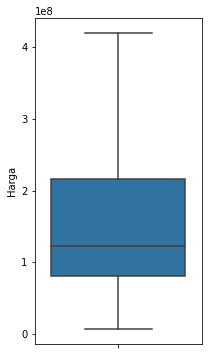

In [10]:
# display boxplot
plt.figure(figsize=(3,6))
sns.boxplot(y='Harga', data=df,showfliers=False);

In [11]:
# Drop outliers grouped by 'Model'

outlier_params = {}
model_set = set()
indexes = []

for item in df['Model']:
    model_set.add(item)

for model in model_set:
    model_df = df.loc[df['Model'] == model]
    param = [model_df['Harga'].mean(),
             model_df['Harga'].std() + 1]
    
    outlier_params[model] = param

for index, row in df.iterrows():
    # Calculate Z-score then group index whose value >=3
    if (np.abs((row['Harga'] - outlier_params[row['Model']][0]) / outlier_params[row['Model']][1]) >= 3):
        indexes.append(index)

print(len(indexes))
df = df.drop(index=indexes) # Remove rows with Z-score >=3

print(df.shape)

105
(14552, 16)


In [12]:
# Drop outliers in general
indexes = []

for index, row in df.iterrows():
    # Calculate Z-score then group index whose value >=3
    if (np.abs((row['Harga'] - df['Harga'].mean()) / df['Harga'].std()) >= 3):
        indexes.append(index)

print(len(indexes))
df = df.drop(index=indexes) # Remove rows with Z-score >=3

print(df.shape)

169
(14383, 16)


In [0]:
# Fill NaN values by modus of corresponding model
from scipy import stats
from math import isnan
import numpy as np

model_nan_filler = {}
model_set = set()

for item in df['Model']:
    model_set.add(item)

for model in model_set:
    model_df = df.loc[df['Model'] == model]
    filler = [stats.mode(model_df['Kapasitas mesin'])[0][0],
              stats.mode(model_df['Sistem Penggerak'])[0][0],
              stats.mode(model_df['Tipe bodi'])[0][0],
              stats.mode(model_df['Tipe Penjual'])[0][0],
              stats.mode(model_df['Varian'])[0][0]]
    
    model_nan_filler[model] = filler

for index, row in df.iterrows():
    if row['Kapasitas mesin'] == 'nan' :
        df.at[index, 'Kapasitas mesin'] = model_nan_filler[row['Model']][0]
    if row['Sistem Penggerak'] is np.nan:
        df.at[index, 'Sistem Penggerak'] = model_nan_filler[row['Model']][1]
    if row['Tipe bodi'] is np.nan:
        df.at[index, 'Tipe bodi'] = model_nan_filler[row['Model']][2]
    if row['Tipe Penjual'] is np.nan:
        df.at[index, 'Tipe Penjual'] = model_nan_filler[row['Model']][3]
    if row['Varian'] is np.nan:
        df.at[index, 'Varian'] = model_nan_filler[row['Model']][4]

df['Kapasitas mesin'] = df['Kapasitas mesin'].astype('str')

In [14]:
df['Harga'].isnull().sum()

0

In [15]:
df.head()

,Harga,Lokasi,Penjual,Merek,Model,Varian,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Tipe bodi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak,Nama Bursa Mobil
0,155000792,"Ngaliyan, Semarang Kota, Jawa Tengah",Tegar Ranisdya,BMW,Serie 3,320i Business Edition,2006,85.000-90.000 km,Bensin,Hitam,Automatic,Sedan,>1.500 - 2.000 cc,Individu,Rear Wheel Drive (RWD),NaN
1,56000000,"Medan Johor, Medan Kota, Sumatra Utara",Anda Syahwilhanto,Hyundai,Getz,Lain-lain,2005,0-5.000 km,Bensin,Biru,Manual,Hatchback,>1.000 - 1.500 cc,Individu,Front Wheel Drive (FWD),NaN
2,120000000,"Ilir Timur I, Palembang Kota, Sumatra Selatan",alvianistm,Isuzu,Grand touring,Lain-lain,2004,10.000-15.000 km,Diesel,Silver,Manual,Minibus,nan,Individu,4X2,NaN
3,169000000,"Balerejo, Madiun Kab., Jawa Timur",PUSAT MOBIL BEKAS SIDOARJO,Isuzu,Grand touring,Lain-lain,2010,100.000-105.000 km,Diesel,Coklat,Manual,Minibus,>2.000 - 3.000 cc,Diler,4X2,NaN
4,120000000,"Kemayoran, Jakarta Pusat, Jakarta D.K.I.",Kristian,Proton,Lain-lain,Lain-lain,2010,75.000-80.000 km,Bensin,Oranye,Manual,Pick-up,>1.500 - 2.000 cc,Individu,Rear Wheel Drive (RWD),Pasar Mobil Kemayoran


In [0]:
# Separate lokasi into three columns ('Kecamatan', 'Kabupaten', 'Provinsi')

location = []
for index, row in df.iterrows():
    location.append(row['Lokasi'].split(', '))

location = pd.DataFrame(location)
location = location.drop([0], axis=1) # Drop columns 'Kecamatan' and 'Provinsi'
location.rename(columns={1:'Kab/Kota'}, inplace=True) # Rename a column
location.rename(columns={2:'Provinsi'}, inplace=True) # Rename a column
df = pd.concat([df, location], axis=1) # Concate with the whole dataframe

In [17]:
df = df.drop(['Lokasi'], axis=1) # Drop column 'Lokasi'
df.head()

,Harga,Penjual,Merek,Model,Varian,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Tipe bodi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak,Nama Bursa Mobil,Kab/Kota,Provinsi
0,155000792.0,Tegar Ranisdya,BMW,Serie 3,320i Business Edition,2006,85.000-90.000 km,Bensin,Hitam,Automatic,Sedan,>1.500 - 2.000 cc,Individu,Rear Wheel Drive (RWD),NaN,Semarang Kota,Jawa Tengah
1,56000000.0,Anda Syahwilhanto,Hyundai,Getz,Lain-lain,2005,0-5.000 km,Bensin,Biru,Manual,Hatchback,>1.000 - 1.500 cc,Individu,Front Wheel Drive (FWD),NaN,Medan Kota,Sumatra Utara
2,120000000.0,alvianistm,Isuzu,Grand touring,Lain-lain,2004,10.000-15.000 km,Diesel,Silver,Manual,Minibus,nan,Individu,4X2,NaN,Palembang Kota,Sumatra Selatan
3,169000000.0,PUSAT MOBIL BEKAS SIDOARJO,Isuzu,Grand touring,Lain-lain,2010,100.000-105.000 km,Diesel,Coklat,Manual,Minibus,>2.000 - 3.000 cc,Diler,4X2,NaN,Madiun Kab.,Jawa Timur
4,120000000.0,Kristian,Proton,Lain-lain,Lain-lain,2010,75.000-80.000 km,Bensin,Oranye,Manual,Pick-up,>1.500 - 2.000 cc,Individu,Rear Wheel Drive (RWD),Pasar Mobil Kemayoran,Jakarta Pusat,Jakarta D.K.I.


In [18]:
df['Provinsi'].isnull().sum()

271

In [19]:
df['Merek'].isnull().sum()

271

In [20]:
df.head()


,Harga,Penjual,Merek,Model,Varian,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Tipe bodi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak,Nama Bursa Mobil,Kab/Kota,Provinsi
0,155000792.0,Tegar Ranisdya,BMW,Serie 3,320i Business Edition,2006,85.000-90.000 km,Bensin,Hitam,Automatic,Sedan,>1.500 - 2.000 cc,Individu,Rear Wheel Drive (RWD),NaN,Semarang Kota,Jawa Tengah
1,56000000.0,Anda Syahwilhanto,Hyundai,Getz,Lain-lain,2005,0-5.000 km,Bensin,Biru,Manual,Hatchback,>1.000 - 1.500 cc,Individu,Front Wheel Drive (FWD),NaN,Medan Kota,Sumatra Utara
2,120000000.0,alvianistm,Isuzu,Grand touring,Lain-lain,2004,10.000-15.000 km,Diesel,Silver,Manual,Minibus,nan,Individu,4X2,NaN,Palembang Kota,Sumatra Selatan
3,169000000.0,PUSAT MOBIL BEKAS SIDOARJO,Isuzu,Grand touring,Lain-lain,2010,100.000-105.000 km,Diesel,Coklat,Manual,Minibus,>2.000 - 3.000 cc,Diler,4X2,NaN,Madiun Kab.,Jawa Timur
4,120000000.0,Kristian,Proton,Lain-lain,Lain-lain,2010,75.000-80.000 km,Bensin,Oranye,Manual,Pick-up,>1.500 - 2.000 cc,Individu,Rear Wheel Drive (RWD),Pasar Mobil Kemayoran,Jakarta Pusat,Jakarta D.K.I.


In [21]:
newdf = df
newdf = newdf.drop(['Penjual', 'Varian', 'Tipe bodi', 'Nama Bursa Mobil', 'Kab/Kota'], axis=1)
newdf.head()

,Harga,Merek,Model,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak,Provinsi
0,155000792.0,BMW,Serie 3,2006,85.000-90.000 km,Bensin,Hitam,Automatic,>1.500 - 2.000 cc,Individu,Rear Wheel Drive (RWD),Jawa Tengah
1,56000000.0,Hyundai,Getz,2005,0-5.000 km,Bensin,Biru,Manual,>1.000 - 1.500 cc,Individu,Front Wheel Drive (FWD),Sumatra Utara
2,120000000.0,Isuzu,Grand touring,2004,10.000-15.000 km,Diesel,Silver,Manual,nan,Individu,4X2,Sumatra Selatan
3,169000000.0,Isuzu,Grand touring,2010,100.000-105.000 km,Diesel,Coklat,Manual,>2.000 - 3.000 cc,Diler,4X2,Jawa Timur
4,120000000.0,Proton,Lain-lain,2010,75.000-80.000 km,Bensin,Oranye,Manual,>1.500 - 2.000 cc,Individu,Rear Wheel Drive (RWD),Jakarta D.K.I.


In [22]:
# Drop rows that have any NaN values
newdf = newdf.dropna()
print(newdf.shape)
newdf.head(100)

(14112, 12)


,Harga,Merek,Model,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak,Provinsi
0,1.550008e+08,BMW,Serie 3,2006,85.000-90.000 km,Bensin,Hitam,Automatic,>1.500 - 2.000 cc,Individu,Rear Wheel Drive (RWD),Jawa Tengah
1,5.600000e+07,Hyundai,Getz,2005,0-5.000 km,Bensin,Biru,Manual,>1.000 - 1.500 cc,Individu,Front Wheel Drive (FWD),Sumatra Utara
2,1.200000e+08,Isuzu,Grand touring,2004,10.000-15.000 km,Diesel,Silver,Manual,nan,Individu,4X2,Sumatra Selatan
3,1.690000e+08,Isuzu,Grand touring,2010,100.000-105.000 km,Diesel,Coklat,Manual,>2.000 - 3.000 cc,Diler,4X2,Jawa Timur
4,1.200000e+08,Proton,Lain-lain,2010,75.000-80.000 km,Bensin,Oranye,Manual,>1.500 - 2.000 cc,Individu,Rear Wheel Drive (RWD),Jakarta D.K.I.
...,...,...,...,...,...,...,...,...,...,...,...,...
99,1.200000e+09,Fiat,Abart,2017,0-5.000 km,Bensin,Kuning,Manual,>1.000 - 1.500 cc,Diler,Front Wheel Drive (FWD),Jakarta D.K.I.
100,8.299998e+07,Datsun,Go,2017,35.000-40.000 km,Bensin,Abu-abu,Manual,>1.000 - 1.500 cc,Individu,Front Wheel Drive (FWD),Jakarta D.K.I.
101,2.350000e+08,Chevrolet,Trax,2018,20.000-25.000 km,Hybrid,Hitam,Automatic,>1.000 - 1.500 cc,Individu,4X2,Sulawesi Selatan
102,2.350000e+08,Mitsubishi,Xpander,2018,15.000-20.000 km,Bensin,Putih,Automatic Triptonic,nan,Individu,4X2,Jakarta D.K.I.


In [23]:
# Drop rows with value other than '>' and '<' in column 'Kapasitas Mesin'
indexes = []

for index, row in newdf.iterrows():
    if row['Kapasitas mesin'][0] != '>' and row['Kapasitas mesin'][0] != '<':
        indexes.append(index)
        
print(indexes)
newdf = newdf.drop(indexes)
newdf.head()

[2, 5, 14, 16, 19, 20, 22, 23, 27, 28, 41, 43, 50, 62, 72, 76, 77, 98, 102, 103, 107, 113, 129, 147, 149, 155, 166, 175, 182, 211, 218, 228, 234, 241, 249, 271, 276, 280, 285, 287, 288, 290, 294, 299, 310, 322, 329, 336, 359, 360, 366, 375, 377, 379, 381, 393, 394, 395, 403, 416, 427, 445, 452, 462, 467, 471, 484, 496, 511, 516, 522, 525, 531, 536, 545, 572, 574, 581, 598, 610, 616, 617, 624, 639, 641, 649, 653, 656, 657, 664, 687, 698, 704, 715, 721, 723, 730, 740, 744, 746, 747, 753, 772, 781, 792, 801, 811, 836, 842, 857, 862, 876, 877, 879, 892, 907, 926, 928, 938, 944, 953, 955, 962, 989, 997, 1008, 1009, 1017, 1022, 1031, 1032, 1047, 1066, 1074, 1075, 1076, 1089, 1090, 1099, 1100, 1107, 1117, 1124, 1128, 1131, 1137, 1142, 1166, 1186, 1191, 1193, 1201, 1215, 1234, 1237, 1238, 1255, 1284, 1285, 1296, 1322, 1323, 1324, 1325, 1341, 1351, 1360, 1368, 1377, 1392, 1400, 1404, 1411, 1413, 1425, 1430, 1440, 1444, 1447, 1448, 1453, 1454, 1468, 1475, 1483, 1501, 1533, 1535, 1536, 1548, 1550

,Harga,Merek,Model,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak,Provinsi
0,155000792.0,BMW,Serie 3,2006,85.000-90.000 km,Bensin,Hitam,Automatic,>1.500 - 2.000 cc,Individu,Rear Wheel Drive (RWD),Jawa Tengah
1,56000000.0,Hyundai,Getz,2005,0-5.000 km,Bensin,Biru,Manual,>1.000 - 1.500 cc,Individu,Front Wheel Drive (FWD),Sumatra Utara
3,169000000.0,Isuzu,Grand touring,2010,100.000-105.000 km,Diesel,Coklat,Manual,>2.000 - 3.000 cc,Diler,4X2,Jawa Timur
4,120000000.0,Proton,Lain-lain,2010,75.000-80.000 km,Bensin,Oranye,Manual,>1.500 - 2.000 cc,Individu,Rear Wheel Drive (RWD),Jakarta D.K.I.
6,420000000.0,Mercedes-Benz,SLK,2005,40.000-45.000 km,Bensin,Silver,Automatic,>1.500 - 2.000 cc,Individu,Rear Wheel Drive (RWD),Banten


In [24]:
# Turn 'Jarak tempuh' and 'Kapasitas mesin' to numerical data
for index, row in newdf.iterrows():
    newdf.at[index, 'Jarak tempuh'] = row['Jarak tempuh'].split('-')[-1].replace(' km', '').replace('<', '').replace('>', '')
    
    newdf.at[index, 'Kapasitas mesin'] = row['Kapasitas mesin'].split('-')[-1][1:].replace(' cc', '')

newdf.head()

,Harga,Merek,Model,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak,Provinsi
0,155000792.0,BMW,Serie 3,2006,90.000,Bensin,Hitam,Automatic,2.000,Individu,Rear Wheel Drive (RWD),Jawa Tengah
1,56000000.0,Hyundai,Getz,2005,5.000,Bensin,Biru,Manual,1.500,Individu,Front Wheel Drive (FWD),Sumatra Utara
3,169000000.0,Isuzu,Grand touring,2010,105.000,Diesel,Coklat,Manual,3.000,Diler,4X2,Jawa Timur
4,120000000.0,Proton,Lain-lain,2010,80.000,Bensin,Oranye,Manual,2.000,Individu,Rear Wheel Drive (RWD),Jakarta D.K.I.
6,420000000.0,Mercedes-Benz,SLK,2005,45.000,Bensin,Silver,Automatic,2.000,Individu,Rear Wheel Drive (RWD),Banten


In [25]:
# Drop rows with value 0 in columns 'Sistem Penggerak' and 'Tipe Penjual'
indexes = []

for index, row in newdf.iterrows():
    if row['Sistem Penggerak'] == 0 or row['Tipe Penjual'] == 0:
        indexes.append(index)
        
print(indexes)
newdf = newdf.drop(indexes)

print(newdf.shape)

[558, 2974, 3726, 3753, 6540, 7810, 8282, 9135, 9156, 10362, 11356, 11921, 12197, 12827]
(12405, 12)


In [26]:
newdf.isnull().sum()

Harga               0
Merek               0
Model               0
Tahun               0
Jarak tempuh        0
Tipe bahan bakar    0
Warna               0
Transmisi           0
Kapasitas mesin     0
Tipe Penjual        0
Sistem Penggerak    0
Provinsi            0
dtype: int64

In [27]:
newdf = newdf.drop(['Tahun', 'Jarak tempuh', 'Kapasitas mesin'], axis=1)
newdf['Harga'] /= 1000000
newdf.head()

,Harga,Merek,Model,Tipe bahan bakar,Warna,Transmisi,Tipe Penjual,Sistem Penggerak,Provinsi
0,155.000792,BMW,Serie 3,Bensin,Hitam,Automatic,Individu,Rear Wheel Drive (RWD),Jawa Tengah
1,56.000000,Hyundai,Getz,Bensin,Biru,Manual,Individu,Front Wheel Drive (FWD),Sumatra Utara
3,169.000000,Isuzu,Grand touring,Diesel,Coklat,Manual,Diler,4X2,Jawa Timur
4,120.000000,Proton,Lain-lain,Bensin,Oranye,Manual,Individu,Rear Wheel Drive (RWD),Jakarta D.K.I.
6,420.000000,Mercedes-Benz,SLK,Bensin,Silver,Automatic,Individu,Rear Wheel Drive (RWD),Banten


In [28]:
for index, row in newdf.iterrows():
  if row['Harga'] <= 200:
    newdf.at[index, 'Jenis'] = 'LGCC'
  if row['Harga'] > 200 and row['Harga'] <= 500:
    newdf.at[index, 'Jenis'] = 'Mid'
  if row['Harga'] > 500:
    newdf.at[index, 'Jenis'] = 'High'


newdf2 = newdf.drop(['Harga'], axis=1)
newdf2.head()

,Merek,Model,Tipe bahan bakar,Warna,Transmisi,Tipe Penjual,Sistem Penggerak,Provinsi,Jenis
0,BMW,Serie 3,Bensin,Hitam,Automatic,Individu,Rear Wheel Drive (RWD),Jawa Tengah,LGCC
1,Hyundai,Getz,Bensin,Biru,Manual,Individu,Front Wheel Drive (FWD),Sumatra Utara,LGCC
3,Isuzu,Grand touring,Diesel,Coklat,Manual,Diler,4X2,Jawa Timur,LGCC
4,Proton,Lain-lain,Bensin,Oranye,Manual,Individu,Rear Wheel Drive (RWD),Jakarta D.K.I.,LGCC
6,Mercedes-Benz,SLK,Bensin,Silver,Automatic,Individu,Rear Wheel Drive (RWD),Banten,Mid


In [29]:
newdf2.values

array([['BMW', 'Serie 3', 'Bensin', ..., 'Rear Wheel Drive (RWD)',
        'Jawa Tengah', 'LGCC'],
       ['Hyundai', 'Getz', 'Bensin', ..., 'Front Wheel Drive (FWD)',
        'Sumatra Utara', 'LGCC'],
       ['Isuzu', 'Grand touring', 'Diesel', ..., '4X2', 'Jawa Timur',
        'LGCC'],
       ...,
       ['Mercedes-Benz', 'C-Class', 'Bensin', ...,
        'Rear Wheel Drive (RWD)', 'Banten', 'Mid'],
       ['Mercedes-Benz', 'CLA-Class', 'Bensin', ...,
        'Front Wheel Drive (FWD)', 'Jakarta D.K.I.', 'High'],
       ['Mitsubishi', 'Xpander', 'Bensin', ..., '4X2', 'Jakarta D.K.I.',
        'Mid']], dtype=object)

In [30]:
newdf2.values
dataset = newdf2.values
print(dataset)

[['BMW' 'Serie 3' 'Bensin' ... 'Rear Wheel Drive (RWD)' 'Jawa Tengah'
  'LGCC']
 ['Hyundai' 'Getz' 'Bensin' ... 'Front Wheel Drive (FWD)' 'Sumatra Utara'
  'LGCC']
 ['Isuzu' 'Grand touring' 'Diesel' ... '4X2' 'Jawa Timur' 'LGCC']
 ...
 ['Mercedes-Benz' 'C-Class' 'Bensin' ... 'Rear Wheel Drive (RWD)'
  'Banten' 'Mid']
 ['Mercedes-Benz' 'CLA-Class' 'Bensin' ... 'Front Wheel Drive (FWD)'
  'Jakarta D.K.I.' 'High']
 ['Mitsubishi' 'Xpander' 'Bensin' ... '4X2' 'Jakarta D.K.I.' 'Mid']]


In [31]:
X = dataset[:, :-1]
X = X.astype(str)
print(X)

[['BMW' 'Serie 3' 'Bensin' ... 'Individu' 'Rear Wheel Drive (RWD)'
  'Jawa Tengah']
 ['Hyundai' 'Getz' 'Bensin' ... 'Individu' 'Front Wheel Drive (FWD)'
  'Sumatra Utara']
 ['Isuzu' 'Grand touring' 'Diesel' ... 'Diler' '4X2' 'Jawa Timur']
 ...
 ['Mercedes-Benz' 'C-Class' 'Bensin' ... 'Individu'
  'Rear Wheel Drive (RWD)' 'Banten']
 ['Mercedes-Benz' 'CLA-Class' 'Bensin' ... 'Diler'
  'Front Wheel Drive (FWD)' 'Jakarta D.K.I.']
 ['Mitsubishi' 'Xpander' 'Bensin' ... 'Individu' '4X2' 'Jakarta D.K.I.']]


In [32]:
y = dataset[:, -1]
print(y)

['LGCC' 'LGCC' 'LGCC' ... 'Mid' 'High' 'Mid']


In [0]:
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 0.232900
Feature 1: 0.392538
Feature 2: 0.010662
Feature 3: 0.040958
Feature 4: 0.123465
Feature 5: 0.051512
Feature 6: 0.020760
Feature 7: 0.003327


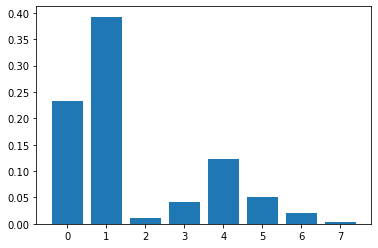

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [0]:
## from the result above, features which is more relevant to the car price are Merek, Model, and Transmisi